## Aula 13 - Agrupamento(Clusters)

In [34]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra)
df <- data.frame(USArrests)

In [35]:
df <- na.omit(df)
df <- scale(df)
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


In [36]:
k2 <- kmeans(df, centers = 2, nstart = 25)
k2

K-means clustering with 2 clusters of sizes 20, 30

Cluster means:
     Murder    Assault   UrbanPop       Rape
1  1.004934  1.0138274  0.1975853  0.8469650
2 -0.669956 -0.6758849 -0.1317235 -0.5646433

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana    

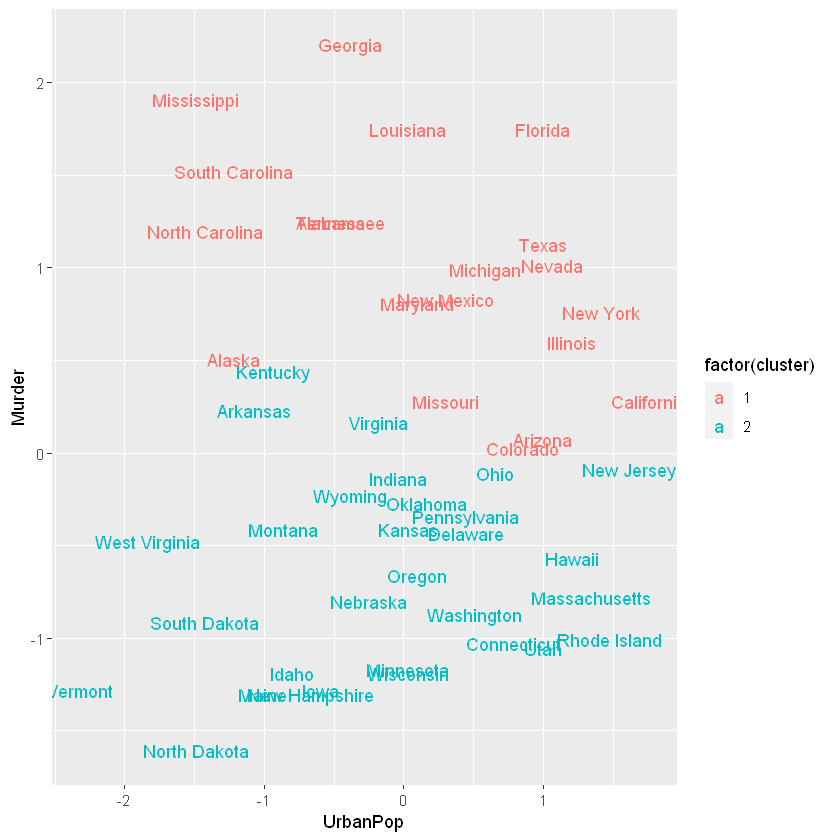

In [37]:
df %>%
  as_tibble() %>%
  mutate(cluster = k2$cluster,
         state = row.names(USArrests)) %>%
  ggplot(aes(UrbanPop, Murder, color = factor(cluster), label = state)) +
  geom_text()

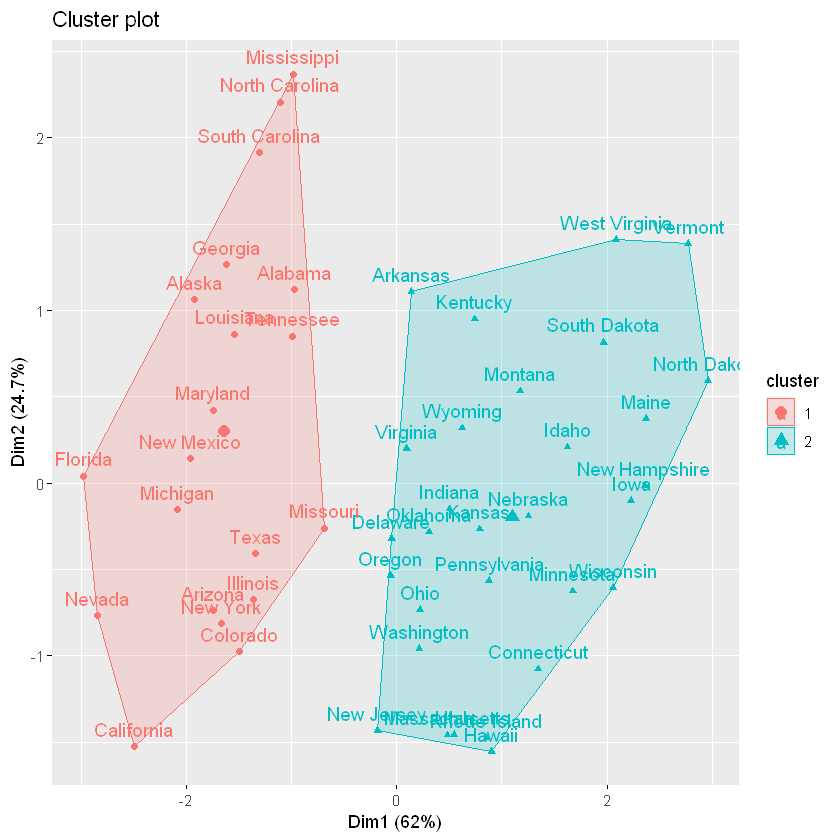

In [38]:
fviz_cluster(k2, data = df)

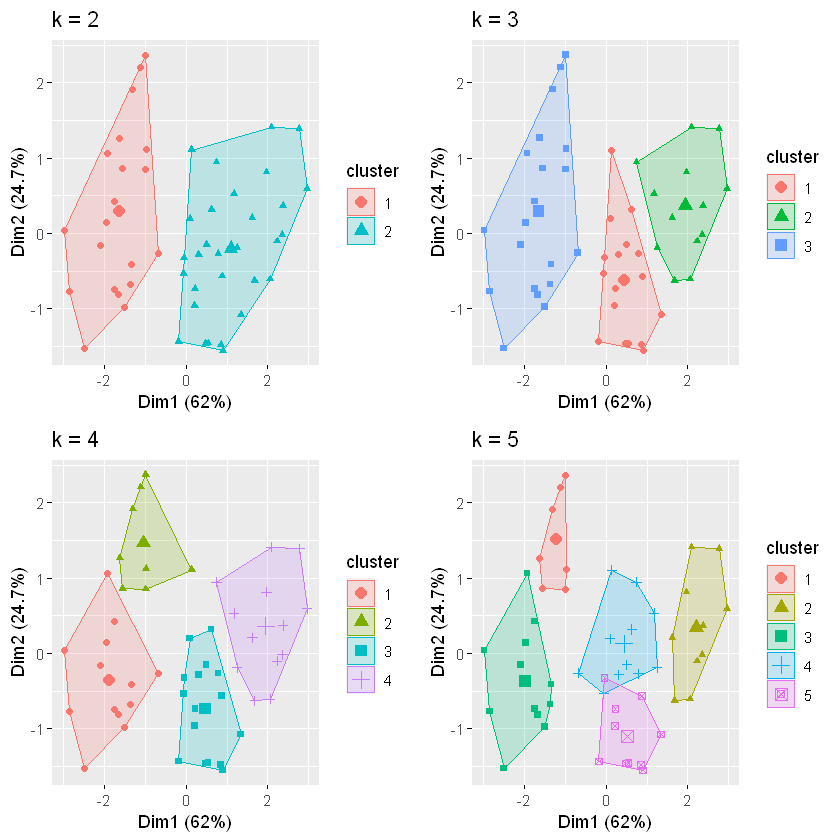

In [39]:
k3 <- kmeans(df, centers = 3, nstart = 25)
k4 <- kmeans(df, centers = 4, nstart = 25)
k5 <- kmeans(df, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df) + ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)

### IRIS ANALYSIS

In [5]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra)
library(gridExtra)
df <- data.frame(iris)

In [10]:
dfCluster <- df[1:4]
head(dfCluster)
dfCluster <- na.omit(dfCluster)
dfCluster <- scale(dfCluster)
head(dfCluster)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


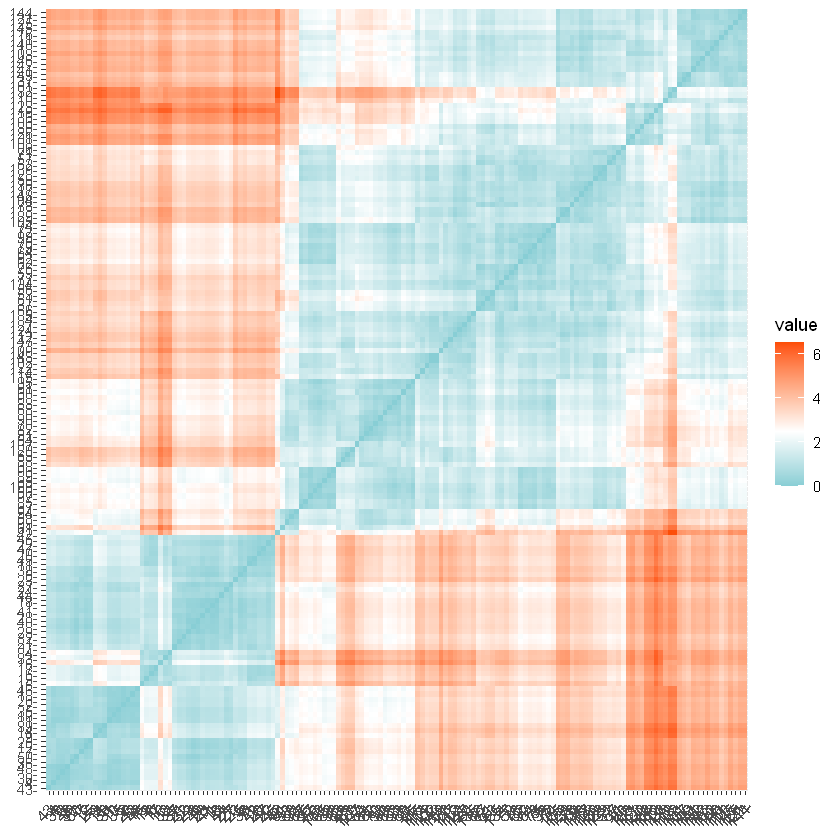

In [11]:
distance <- get_dist(dfCluster)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

In [23]:
k2 <- kmeans(dfCluster, centers = 2, nstart = 25)
str(k2)

List of 9
 $ cluster     : Named int [1:150] 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ centers     : num [1:2, 1:4] 0.506 -1.011 -0.425 0.85 0.65 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 596
 $ withinss    : num [1:2] 173.5 47.4
 $ tot.withinss: num 221
 $ betweenss   : num 375
 $ size        : int [1:2] 100 50
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [24]:
k2

K-means clustering with 2 clusters of sizes 100, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1    0.5055957  -0.4252069     0.650315   0.6253518
2   -1.0111914   0.8504137    -1.300630  -1.2507035

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   2   2   2   2   2   2   2   2   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1

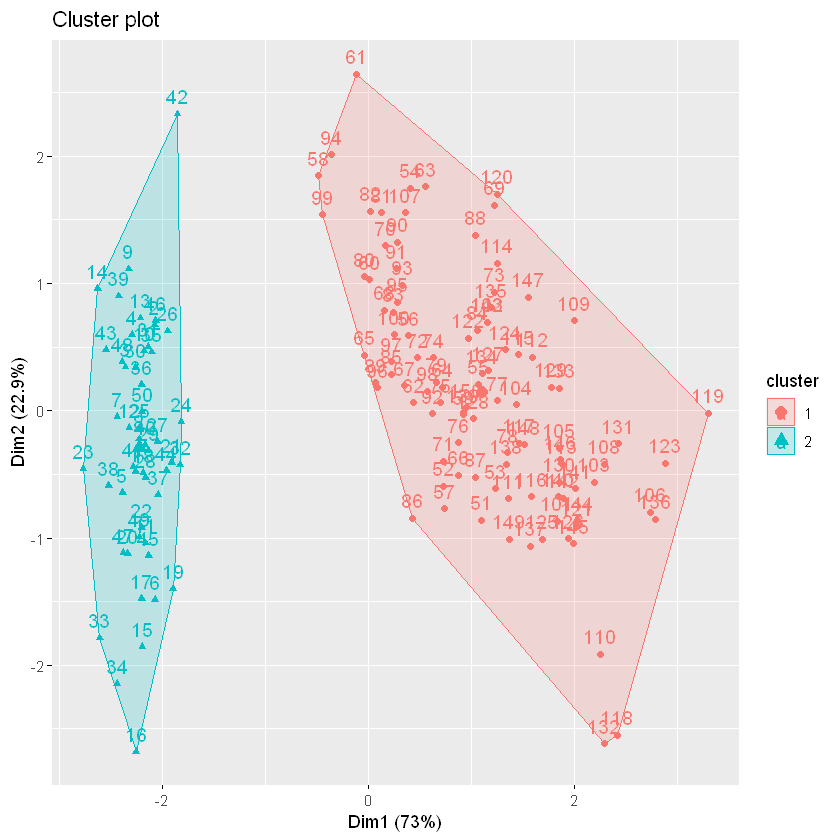

In [25]:
fviz_cluster(k2, data = dfCluster)

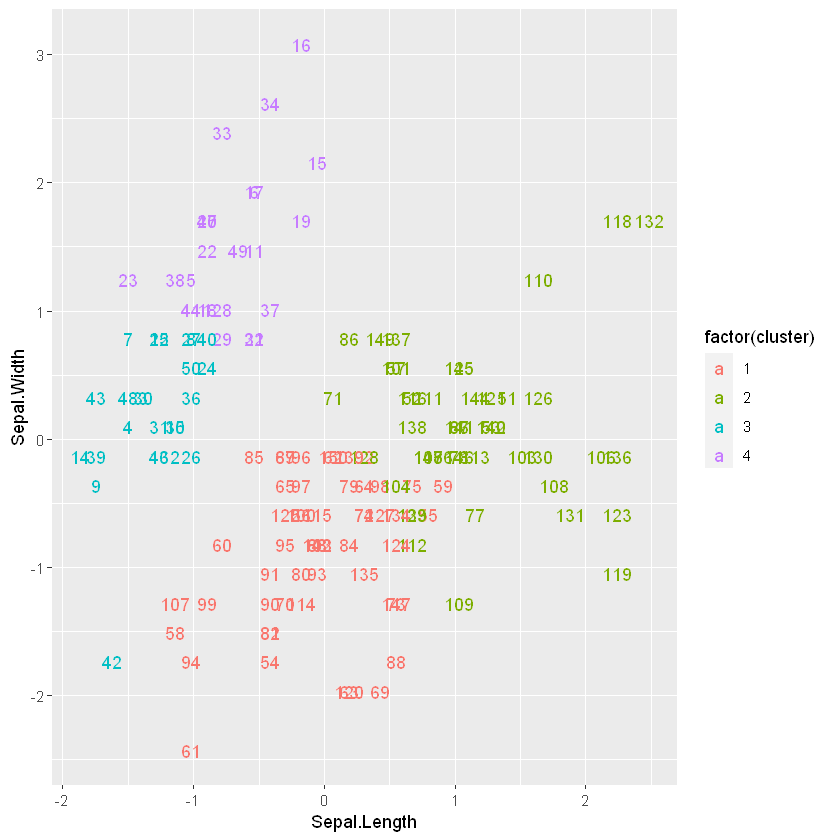

In [19]:
dfCluster %>%
  as_tibble() %>%
  mutate(cluster = k2$cluster,
         state = row.names(iris)) %>%
  ggplot(aes(Sepal.Length, Sepal.Width, color = factor(cluster), label = state)) +
  geom_text()

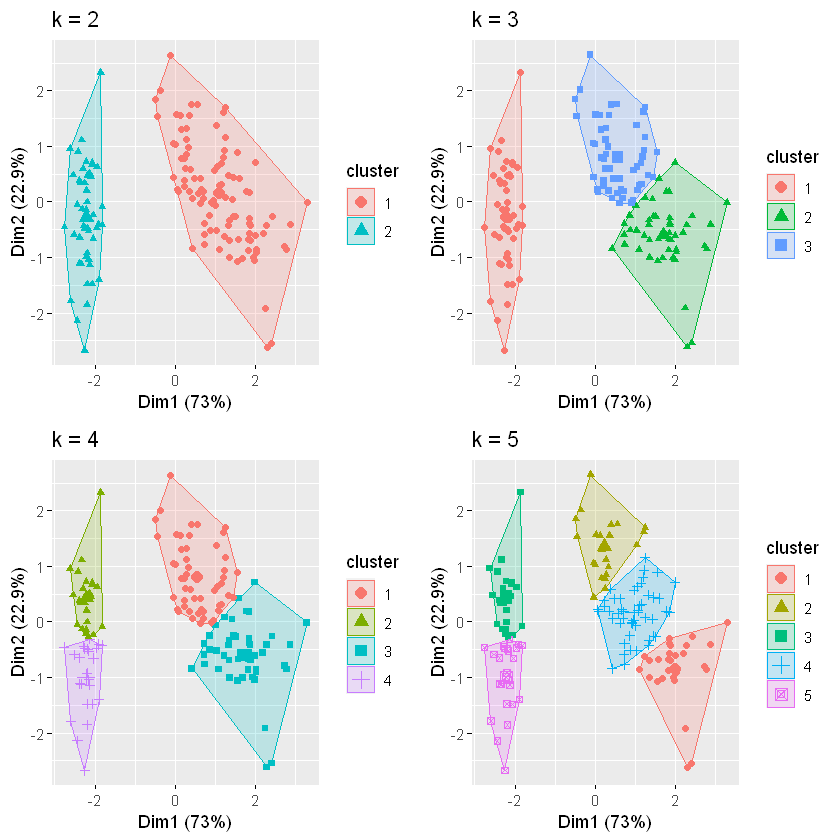

In [31]:
k3 <- kmeans(dfCluster, centers = 3, nstart = 25)
k4 <- kmeans(dfCluster, centers = 4, nstart = 25)
k5 <- kmeans(dfCluster, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = dfCluster) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = dfCluster) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = dfCluster) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = dfCluster) + ggtitle("k = 5")

grid.arrange(p1, p2, p3, p4, nrow = 2)

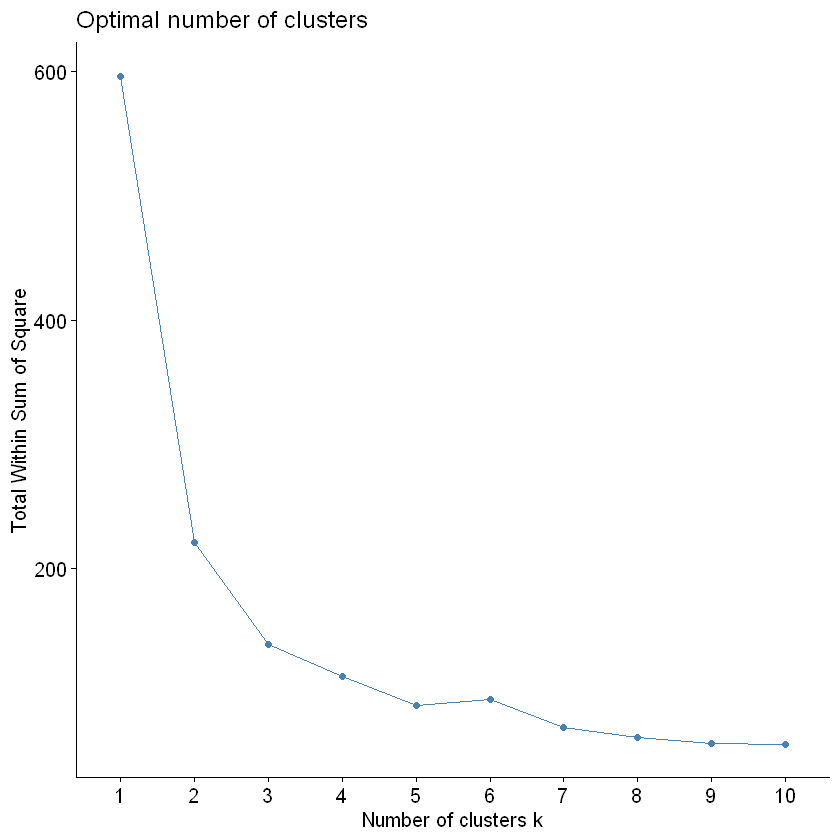

In [27]:
#Encontrar numero "ideal" de clusters
fviz_nbclust(dfCluster, kmeans, method = "wss")

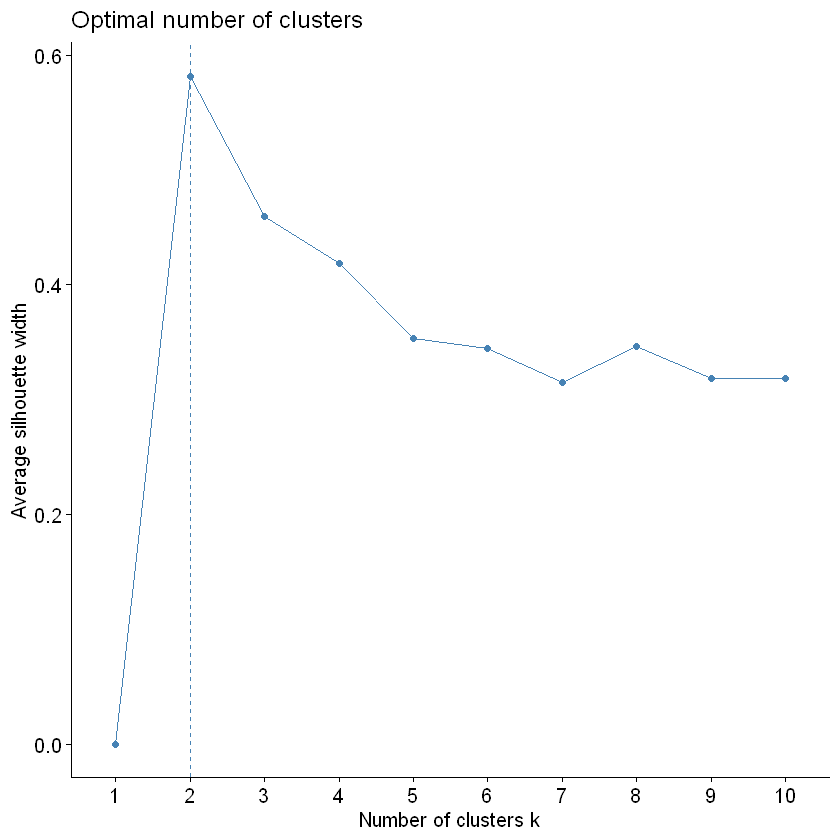

In [29]:
fviz_nbclust(dfCluster, kmeans, method = "silhouette")

In [32]:

gap_stat <- clusGap(dfCluster, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = dfCluster, FUNcluster = kmeans, K.max = 10, B = 50,     nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 3
          logW   E.logW       gap     SE.sim
 [1,] 4.534565 4.757299 0.2227340 0.02793794
 [2,] 4.021316 4.488556 0.4672399 0.02700124
 [3,] 3.806577 4.296696 0.4901183 0.02072828
 [4,] 3.699263 4.142650 0.4433868 0.02508881
 [5,] 3.587492 4.050674 0.4631815 0.02134660
 [6,] 3.520895 3.974362 0.4534677 0.02135546
 [7,] 3.448288 3.908477 0.4601891 0.01968792
 [8,] 3.398210 3.851700 0.4534896 0.01857756
 [9,] 3.313535 3.802538 0.4890034 0.01872585
[10,] 3.250246 3.758897 0.5086505 0.01910238


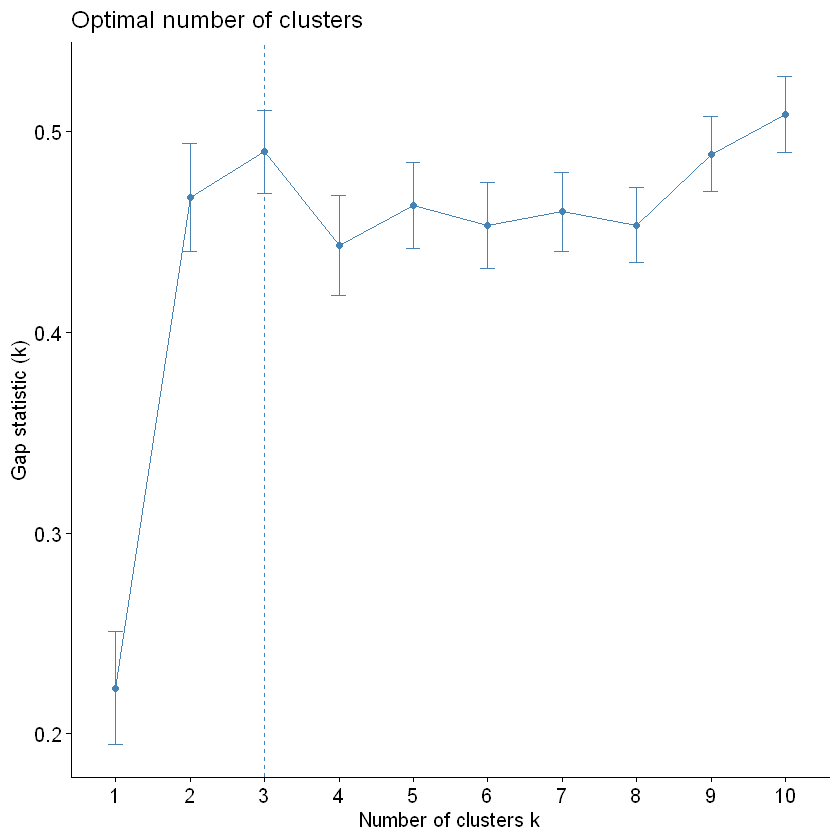

In [33]:
fviz_gap_stat(gap_stat)

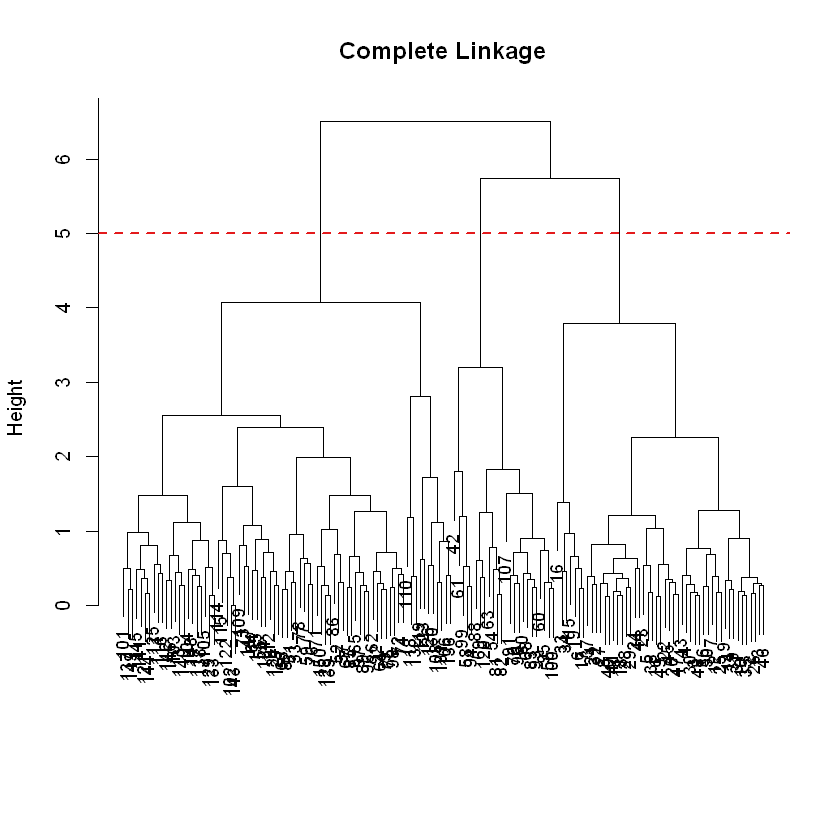

In [39]:
mun.hc.complete <- hclust(distance, method="complete")


#par(mfrow=c(1,3))
plot(mun.hc.complete, main="Complete Linkage", xlab="", sub="",
     cex=.9)
abline(h=5, lty=2, lwd=2, col = "#E31A1C")